In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import arabic_reshaper
from bidi.algorithm import get_display
import os
import codecs
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from joblib import load, dump 
import h5py
from tensorflow.keras.models import load_model

# Reading Arabic_tweets_positive dataset

In [2]:
#set erro_bad_lines = False, it needed when the csv has too many commas
cols = ['class','tweet_text']
positive = pd.read_csv('positive.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [3]:
positive.head(50)

,class,tweet_text
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
5,pos,#الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...
6,pos,احبك انت وياه واموري من سعه 🎶
7,pos,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
8,pos,وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
9,pos,اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...


# Sample of the positive twittes text

In [4]:
positive['tweet_text'].head(10)

0    نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1    وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2                                      من الخير نفسه 💛
3    #زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4    الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
5    #الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبي...
6                        احبك انت وياه واموري من سعه 🎶
7    #تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
8    وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
9    اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...
Name: tweet_text, dtype: object

# Sample of the target 

In [5]:
positive['class'].head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: class, dtype: object

# EDA on the postive dataset

In [6]:
np.sum(positive.isnull().any(axis=1))

0

In [7]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [8]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28513 entries, 0 to 28512
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28513 non-null  object
 1   tweet_text  28513 non-null  object
dtypes: object(2)
memory usage: 445.6+ KB


# Cleaning the text

In [9]:
for letter in '#.][!XRﷺ':
    positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')

In [10]:
positive.head(10)

,class,tweet_text
0,pos,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,pos,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترضى...
4,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
5,pos,الاتحاد_النصر لاتحسبونا نسينا يالطواقي ولانبيك...
6,pos,احبك انت وياه واموري من سعه 🎶
7,pos,تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫 ...
8,pos,وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
9,pos,اللهم آمين يارب العالمين انتي وانا وامة سيدنا ...


using (import string) which is return all ASCII letters (both lower and upper case)

In [11]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

use of regular expression (re) substitution

In [12]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [13]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)
    

In [14]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [15]:
# using apply method to implement the processPost func on each value in each row in the data
positive["tweet_text"] = positive['tweet_text'].apply(lambda x: processPost(x)) 

In [16]:
positive.head(25)


,class,tweet_text
0,pos,نحن الذين يتحول كل ما نود ان نقوله الي دعاء له...
1,pos,وفي النهايه لن يبقيٰ معك احدالا من رايٰ الجمال...
2,pos,من الخير نفسه 💛
3,pos,زلزلالملعبنصرنابيلعب كن عالي الهمه ولا ترضي بغ...
4,pos,الشيء الوحيد الذي وصلوا فيه لعالميه هو المسيار...
5,pos,الاتحادالنصر لاتحسبونا نسينا يالطواقي ولانبيكم...
6,pos,احبك انت وياه واموري من سعه 🎶
7,pos,تامل قال اله ﷻ ​﴿بواد غير ذي زرع ﴾ 💫 ✍ ومع ذلك...
8,pos,وينهم الي يرقصوا مع زخات المطر 💃 خلونا نشوفكم ...
9,pos,الهم امين يارب العالمين انتي وانا وامه سيدنا م...


In [17]:
tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)


In [18]:
positive["tweet_text"].head(10)

0    [نحن, الذين, يتحول, كل, ما, نود, ان, نقوله, ال...
1    [وفي, النهايه, لن, يبقي, معك, احدالا, من, راي,...
2                                    [من, الخير, نفسه]
3    [زلزلالملعبنصرنابيلعب, كن, عالي, الهمه, ولا, ت...
4    [الشيء, الوحيد, الذي, وصلوا, فيه, لعالميه, هو,...
5    [الاتحادالنصر, لاتحسبونا, نسينا, يالطواقي, ولا...
6                   [احبك, انت, وياه, واموري, من, سعه]
7    [تامل, قال, اله, ﷻ, بواد, غير, ذي, زرع, ومع, ذ...
8    [وينهم, الي, يرقصوا, مع, زخات, المطر, خلونا, ن...
9    [الهم, امين, يارب, العالمين, انتي, وانا, وامه,...
Name: tweet_text, dtype: object

In [19]:
stopwords_list = stopwords.words('arabic')
w=['ال','الي','و', 'ان', 'ع', 'اذا', 'او', 'الا', 'ف']
for i in w:
    stopwords_list.append(i)

In [20]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [21]:
len(stopwords_list)

763

In [22]:
listToStr = ' '.join([str(elem) for elem in stopwords_list])

In [23]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

In [24]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [25]:
positive["tweet_text"].head(10)

0    [يتحول, نود, نقوله, دعاء, تبحثوا, فينا, قوه, ا...
1    [وفي, النهايه, يبقي, معك, احدالا, راي, الجمال,...
2                                        [الخير, نفسه]
3    [زلزلالملعبنصرنابيلعب, عالي, الهمه, ترضي, بغير...
4    [الشيء, الوحيد, وصلوا, لعالميه, المسيار, تري, ...
5    [الاتحادالنصر, لاتحسبونا, نسينا, يالطواقي, ولا...
6                       [احبك, انت, وياه, واموري, سعه]
7    [تامل, قال, اله, ﷻ, بواد, زرع, ومع, هتف, بالدع...
8    [وينهم, يرقصوا, زخات, المطر, خلونا, نشوفكم, لا...
9    [الهم, امين, يارب, العالمين, انتي, وانا, وامه,...
Name: tweet_text, dtype: object

# Positive tweets text information

In [26]:
all_words = [word for tokens in positive["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

274519 words total, with a vocabulary size of 43401
Max sentence length 985


# Arabic_tweets_negative dataset

In [27]:
cols = ['class','tweet_text']
negative = pd.read_csv('négative.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

In [28]:
negative.head(50)

,class,tweet_text
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,#الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3,neg,نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4,neg,الدودو جايه تكمل علي 💔
5,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
6,neg,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...
7,neg,جالس أذاكر 😣
8,neg,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...
9,neg,ياليلل ترا اكلج كثير مشي 😭


# Sample of the negative twittes text

In [29]:
negative['tweet_text'].head()

0    اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1    توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2    #الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال و...
3    نعمة المضادات الحيوية . تضع قطرة💧مضاد بنسلين ع...
4                               الدودو جايه تكمل علي 💔
Name: tweet_text, dtype: object

# Sample of the target 

In [30]:
negative['class'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [31]:
np.sum(negative.isnull().any(axis=1))

0

# EDA

In [32]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45028 entries, 0 to 45027
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       45028 non-null  object
 1   tweet_text  45028 non-null  object
dtypes: object(2)
memory usage: 703.7+ KB


# Cleaning the text

In [33]:
for letter in '#.][!XRﷺ':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [34]:
negative.head(25)

,class,tweet_text
0,neg,اعترف ان بتس كانو شوي شوي يجيبو راسي لكن اليوم...
1,neg,توقعت اذا جات داريا بشوفهم كاملين بس لي للحين ...
2,neg,الاهلي_الهلال اكتب توقعك لنتيجة لقاء الهلال وا...
3,neg,نعمة المضادات الحيوية تضع قطرة💧مضاد بنسلين عل...
4,neg,الدودو جايه تكمل علي 💔
5,neg,أحببته حتى أقنعنى إن ما فات من العمر كان إنتظا...
6,neg,يبدو ان دجلة اعتادت على التهام اجساد ابنائها م...
7,neg,جالس أذاكر 😣
8,neg,يكفي استخفاف بالعقل العربي هل حقا الأمن والمخا...
9,neg,ياليلل ترا اكلج كثير مشي 😭


In [35]:
def processPost(tweet): 

    #delete @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #delete www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    tweet = re.sub(r'\s*[A-Za-z]+\b', '' , tweet)
    tweet = tweet.rstrip()
    
    return tweet

In [36]:
# apply used to call the method processpost
negative["tweet_text"] = negative['tweet_text'].apply(lambda x: processPost(x)) 

splits a string into substrings using a regular expression

In [37]:
tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [38]:
negative["tweet_text"].head()

0    [اعترف, ان, بتس, كانو, شوي, شوي, يجيبو, راسي, ...
1    [توقعت, اذا, جات, داريا, بشوفهم, كاملين, بس, ل...
2    [الاهليالهلال, اكتب, توقعك, لنتيجه, لقاء, الهل...
3    [نعمه, المضادات, الحيويه, تضع, قطره, مضاد, بنس...
4                            [الدودو, جايه, تكمل, علي]
Name: tweet_text, dtype: object

In [39]:
stopwords_list = stopwords.words('arabic')
w=['و', 'ان', 'ع', 'اذا', 'او', 'الا', 'ف']
for i in w:
    stopwords_list.append(i)

In [40]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [41]:
negative['tweet_text'].head(25)

0     [اعترف, بتس, كانو, شوي, شوي, يجيبو, راسي, اليو...
1     [توقعت, جات, داريا, بشوفهم, كاملين, لحين, احس,...
2     [الاهليالهلال, اكتب, توقعك, لنتيجه, لقاء, الهل...
3     [نعمه, المضادات, الحيويه, تضع, قطره, مضاد, بنس...
4                             [الدودو, جايه, تكمل, علي]
5              [احبته, حتي, اقنعني, فات, العمر, انتظار]
6     [يبدو, دجله, اعتادت, علي, التهام, اجساد, ابنائ...
7                                         [جالس, اذاكر]
8     [يكفي, استخفاف, بالعقل, العربي, الامن, والمخاب...
9                         [ياليل, ترا, اكلج, كثير, مشي]
10    [بيدي, ارجع, ساعتي, وين, ارجع, اليا, صدفه, وال...
11                                [ليه, محد, يسوي, معي]
12    [انت, يمكن, الي, ناسي, احداث, البصره, شهور, مت...
13                                          [اله, يعين]
14    [اتفرج, علي, اداءاتهم, امس, تقريبا, كلهم, قربو...
15    [تبي, شي, يقويك, جنسيا, فوريفر, تعطيك, مجموعه,...
16                          [مش, وقته, خالص, التعب, ده]
17    [عرفنا, انه, الفلوس, تغير, النفوس, اما, تغ

# Negative tweets text information

In [42]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print(f'{len(all_words)} words total, with a vocabulary size of {len(VOCAB)}')
print(f'Max sentence length {max(sentence_lengths)}')

406656 words total, with a vocabulary size of 37665
Max sentence length 786


# Prepare the Final Data

concatenate the postive and negative classes

In [43]:
full_data = pd.concat([positive, negative], axis=0, ignore_index=True)

In [44]:
full_data.head(-50)

,class,tweet_text
0,pos,"[يتحول, نود, نقوله, دعاء, تبحثوا, فينا, قوه, ا..."
1,pos,"[وفي, النهايه, يبقي, معك, احدالا, راي, الجمال,..."
2,pos,"[الخير, نفسه]"
3,pos,"[زلزلالملعبنصرنابيلعب, عالي, الهمه, ترضي, بغير..."
4,pos,"[الشيء, الوحيد, وصلوا, لعالميه, المسيار, تري, ..."
...,...,...
73486,neg,"[قاعده, اسوي, جدول, اجازتيوانا, اصلا, ماشفت, ج..."
73487,neg,"[اكثر, يهدم, العلاقات, انتظار, يسال, اولا]"
73488,neg,"[استطع, النوم]"
73489,neg,"[امي, يقال, البكاء, يتعب, الميت, سامحيني, فقد,..."


In [45]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73541 entries, 0 to 73540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       73541 non-null  object
 1   tweet_text  73541 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [46]:
len(full_data)

73541

In [47]:
y=full_data['class']
y.value_counts()

neg    45028
pos    28513
Name: class, dtype: int64

# Showing how the dataset is balance

In [48]:
full_data['class'].value_counts()

neg    45028
pos    28513
Name: class, dtype: int64

# Convert class values (pos, neg) to (1,0) 

In [49]:
pro= preprocessing.LabelEncoder()
enc_pro=pro.fit_transform(full_data['class'])
full_data['class'] = enc_pro


# Save the final dataset

In [50]:
full_data.to_pickle('full_df.pickle')

In [51]:
full_df = pd.read_pickle('full_df.pickle')
type(full_df['tweet_text'].astype('str'))

pandas.core.series.Series

In [52]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73541 entries, 0 to 73540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       73541 non-null  int32 
 1   tweet_text  73541 non-null  object
dtypes: int32(1), object(1)
memory usage: 861.9+ KB


# Machine Learning part

# TFIDF

In [53]:
full_df['tweet_text'].apply(lambda x: " ".join(x)).values

array(['يتحول نود نقوله دعاء تبحثوا فينا قوه انا مكسورون القوه',
       'وفي النهايه يبقي معك احدالا راي الجمال روحك امالمنبهرون بالمظا',
       'الخير نفسه', ..., 'لاول مره بنكون سوا', 'بقله ليش واطي',
       'طال صبري النوي اذ تركتني كئيبا غريبا باكيا متوجعا يامهجتي ياروح قلبي ياراحتي اغثني قلبي'],
      dtype=object)

In [54]:
word_vectorizer= TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1,1),
    max_features= 10000)

word_vec= word_vectorizer.fit_transform(full_data['tweet_text'].astype('str'))
word_vec_arr=word_vec.toarray()
vocab=word_vectorizer.get_feature_names()
word_vec_features=pd.DataFrame.sparse.from_spmatrix(word_vec, columns=vocab)
word_vec_features.head(10)

,10,15,16,1953,250,30,40,412,413,419,...,چذب,کل,ڪل,ڪلما,ګنت,گثيرا,ۈل,یبقی,یوم,ᓄᓚᓅɺ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
word_vec_features=pd.DataFrame.sparse.from_spmatrix(word_vec, columns=vocab)
word_vec_features.head(20)

,10,15,16,1953,250,30,40,412,413,419,...,چذب,کل,ڪل,ڪلما,ګنت,گثيرا,ۈل,یبقی,یوم,ᓄᓚᓅɺ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# import joblib

In [57]:
# with open('app/tfidf_model.joblib', 'wb') as f:
#     joblib.dump(word_vec, f )

In [58]:
# with open('app/tfidf_model.joblib', 'r') as f:
#     word_vectorizer = joblib.load('app/tfidf_model.joblib')


In [59]:
type(word_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [60]:
y=full_data['class']
X=word_vec_features

In [61]:
X.shape, y.shape

((73541, 10000), (73541,))

# Spliting Dataset into 80% Training and 20% Testing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scores = []

In [63]:
y_test.value_counts()

0    8976
1    5733
Name: class, dtype: int64

# Deep Learning

Multi layer perseptron

In [64]:
# first neural network with keras tutorial

# define the keras model

model = Sequential()
model.add(Dense(16, input_dim=10000, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#using early stop
es_callback = EarlyStopping(monitor='val_loss', patience=5)
# fit the keras model on the dataset
history=model.fit(X_train, y_train, callbacks=[es_callback], validation_data=(X_test, y_test), epochs=65, batch_size=64)


Epoch 1/65
920/920 [==============================] - 111s 117ms/step - loss: 0.6020 - accuracy: 0.6735 - val_loss: 0.4658 - val_accuracy: 0.7909
Epoch 2/65
920/920 [==============================] - 30s 33ms/step - loss: 0.4837 - accuracy: 0.7713 - val_loss: 0.4049 - val_accuracy: 0.8145
Epoch 3/65
920/920 [==============================] - 53s 57ms/step - loss: 0.4365 - accuracy: 0.7982 - val_loss: 0.3828 - val_accuracy: 0.8215
Epoch 4/65
920/920 [==============================] - 34s 37ms/step - loss: 0.4072 - accuracy: 0.8145 - val_loss: 0.3690 - val_accuracy: 0.8272
Epoch 5/65
920/920 [==============================] - 37s 40ms/step - loss: 0.3892 - accuracy: 0.8230 - val_loss: 0.3608 - val_accuracy: 0.8341
Epoch 6/65
920/920 [==============================] - 34s 37ms/step - loss: 0.3732 - accuracy: 0.8319 - val_loss: 0.3570 - val_accuracy: 0.8397
Epoch 7/65
920/920 [==============================] - 38s 41ms/step - loss: 0.3607 - accuracy: 0.8402 - val_loss: 0.3560 - val_accurac

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,161
Trainable params: 160,161
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


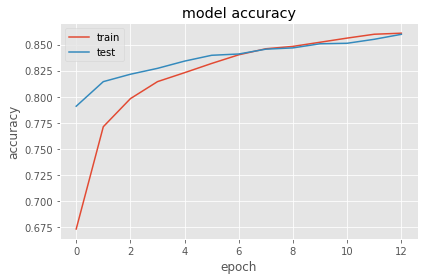

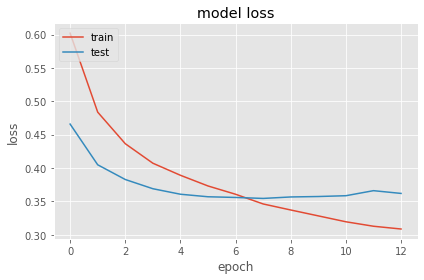

<Figure size 432x288 with 0 Axes>

In [66]:
# Fit the model
# history=model.fit(X_train, y_train, callbacks=[es_callback], validation_data=(X_test, y_test), epochs=65, batch_size=64, )

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('model_accuracy.jpg')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig2= plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig2.savefig('model_loss.jpg')

In [67]:
# evaluate
acc = model.evaluate(X_test, y_test)
scores.append(round(acc[1],3))
round(acc[1],3)

460/460 [==============================] - 4s 9ms/step - loss: 0.3620 - accuracy: 0.8597


0.86

# Saving the Multilaye perseptrone model

In [68]:
import h5py
from tensorflow.keras.models import load_model

In [69]:
# model.save('app/mlp_model.h5')

In [70]:
mlp_model=load_model('mlp_model.h5')

In [71]:
val_predicts = mlp_model.predict(X_test)
y_pred = [1 * (x[0]>=0.5) for x in val_predicts]
cm = confusion_matrix(y_test, y_pred)
# print(val_predicts)
# print(y_pred)
print(cm)

[[5425 3551]
 [3180 2553]]


In [72]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(5425, 3551, 3180, 2553)

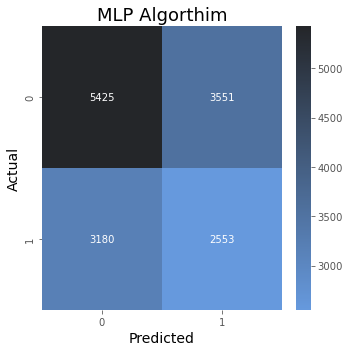

<Figure size 432x288 with 0 Axes>

In [73]:
fig, ax = plt.subplots(1, figsize = (5,5))
hm=sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap([[tn, fp], [fn, tp]], annot=True,fmt="d", cmap=hm)
ax.set_title('MLP Algorthim', fontsize=18)
ax.set_xlabel('Predicted', fontsize=14, color='black')
ax.set_ylabel('Actual', fontsize=14, color='black')
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
plt.draw()
fig1.savefig('mlp_cm.jpg', dpi=100);

# Using the model to predict the class of new tweets

prdecting new negative commit

In [74]:
twt=['من المؤسف ما حدث في السنة الماضية وعدد الناس الذين ماتو بالكرونا والمؤسف اكثر انه لم ينتهي بعد']
x = word_vectorizer.transform(twt)

In [75]:
x.sort_indices()
pred=mlp_model.predict(x)
if pred >= 0.5:
    print('positive')
else:
    print('negative')

pred

negative


array([[0.15041745]], dtype=float32)

In [76]:
twt=['اشتقت ل حديثك ، و كأني لم احادثك منذ سنين 💔']
x = word_vectorizer.transform(twt)

In [77]:
x.sort_indices()
pred=mlp_model.predict(x)
if pred >= 0.5:
    print('positive')
else:
    print('negative')

pred

negative


array([[0.07064462]], dtype=float32)

predicting positive comment

In [78]:
twt2=['مرحبا، حبيت اشاركم فرحتي، اشتركت في برنامج مكثف لدراسة علوم البيانات وتخرجت مكتسبة الكثير من المعلومات']
c = word_vectorizer.transform(twt2)

In [79]:
c.sort_indices()
pred=mlp_model.predict(c)
if pred >= 0.4:
    print('positive')
else:
    print('negative')

pred

positive


array([[0.98049235]], dtype=float32)

In [80]:
twt3=[' أعلنت وزيرة الصحة في مصر هالة زايد اليوم الأربعاء، إطلاق المشروع القومي للتبرع بالبلازما، ضمن مبادرة رئيس الجمهورية والاكتفاء الذاتي من مشتقات البلازما.']
c = word_vectorizer.transform(twt3)

In [81]:
c.sort_indices()
pred=mlp_model.predict(c)
if pred >= 0.4:
    print('positive')
else:
    print('negative')

pred

positive


array([[0.9495859]], dtype=float32)